<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/04-05-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,130689,190122
34,NJ,41090,47942
24,MI,17221,30030
20,LA,14867,54299
5,CA,14336,103095
21,MA,13837,62592
10,FL,13324,109950
41,PA,12980,70874
16,IL,12262,50680
52,WA,7984,83391


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [8]:
dfUSAPos[-7:]

,date,positive,PCT
27,2020-03-31,184683,0.511119
28,2020-04-01,210816,0.583443
29,2020-04-02,239099,0.661717
30,2020-04-03,271988,0.752739
31,2020-04-04,305755,0.846191
32,2020-04-05,332308,0.919678
33,2020-04-06,361331,1.000000


In [9]:
dfCAPos[-7:]

,date,positive,PCT
27,2020-03-31,7482,0.521903
28,2020-04-01,8155,0.568848
29,2020-04-02,9191,0.641113
30,2020-04-03,10701,0.746443
31,2020-04-04,12026,0.838867
32,2020-04-05,13438,0.937360
33,2020-04-06,14336,1.000000


In [10]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-02,239099,1028649,62101,17157.0,32649.0,4264.0,541.0,67.0,661.0,8586.0,5784,32649.0,1329849,1267748,1267748,1084.0,4335.0,89459.0,28283.0,117742.0
2020-04-03,271988,1124874,61980,19926.0,35991.0,4686.0,593.0,70.0,728.0,10422.0,6962,35991.0,1458842,1396862,1396862,1178.0,3509.0,96225.0,32889.0,129114.0
2020-04-04,305755,1318052,15573,22158.0,38402.0,5207.0,691.0,656.0,154.0,12784.0,8314,38402.0,1639380,1623807,1623807,1352.0,4404.0,193178.0,33767.0,226945.0
2020-04-05,332308,1429724,17307,23061.0,41372.0,5497.0,913.0,612.0,193.0,14486.0,9498,41372.0,1779339,1762032,1762032,1184.0,3322.0,111672.0,26553.0,138225.0
2020-04-06,361331,1555764,17292,27675.0,45168.0,6607.0,971.0,2932.0,187.0,16006.0,10680,45168.0,1934387,1917095,1917095,1182.0,3796.0,126040.0,29023.0,155063.0


In [11]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-02,9191,23809,59500,1922.0,0.0,816.0,0.0,0.0,0.0,0.0,203,0.0,92500,33000,33000,32.0,0.0,2037.0,1036.0,3073.0
2020-04-03,10701,24599,59500,2188.0,0.0,901.0,0.0,0.0,0.0,0.0,237,0.0,94800,35300,35300,34.0,0.0,790.0,1510.0,2300.0
2020-04-04,12026,101674,13000,2300.0,0.0,1008.0,0.0,0.0,0.0,0.0,276,0.0,126700,113700,113700,39.0,0.0,77075.0,1325.0,78400.0
2020-04-05,13438,103095,15000,2398.0,0.0,1040.0,0.0,0.0,0.0,0.0,319,0.0,131533,116533,116533,43.0,0.0,1421.0,1412.0,2833.0
2020-04-06,14336,103095,15000,2509.0,0.0,1085.0,0.0,0.0,0.0,0.0,343,0.0,132431,117431,117431,24.0,0.0,0.0,898.0,898.0


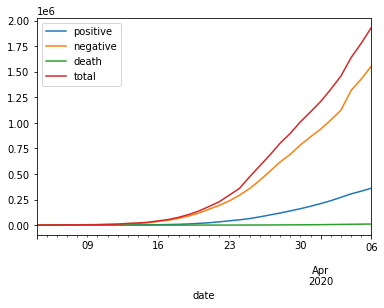

In [12]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [13]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-03-24,42164,471
2020-03-25,51914,673
2020-03-26,63570,884
2020-03-27,68334,991
2020-03-28,85228,1243
2020-03-29,103321,1668
2020-03-30,122653,2112
2020-03-31,140640,2398
2020-04-01,163199,2850


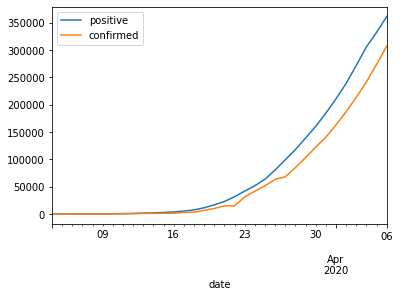

In [14]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [15]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-03-31,7482,21772,57400,1617.0,1617.0,657.0,657.0,0.0,0.0,0.0,153,1617.0,86654,29254,29254,20.0,185.0,1223.0,1035.0,2258.0
2020-04-01,8155,21772,57400,1855.0,1855.0,774.0,774.0,0.0,0.0,0.0,171,1855.0,87327,29927,29927,18.0,238.0,0.0,673.0,673.0
2020-04-02,9191,23809,59500,1922.0,0.0,816.0,0.0,0.0,0.0,0.0,203,0.0,92500,33000,33000,32.0,0.0,2037.0,1036.0,3073.0
2020-04-03,10701,24599,59500,2188.0,0.0,901.0,0.0,0.0,0.0,0.0,237,0.0,94800,35300,35300,34.0,0.0,790.0,1510.0,2300.0
2020-04-04,12026,101674,13000,2300.0,0.0,1008.0,0.0,0.0,0.0,0.0,276,0.0,126700,113700,113700,39.0,0.0,77075.0,1325.0,78400.0
2020-04-05,13438,103095,15000,2398.0,0.0,1040.0,0.0,0.0,0.0,0.0,319,0.0,131533,116533,116533,43.0,0.0,1421.0,1412.0,2833.0
2020-04-06,14336,103095,15000,2509.0,0.0,1085.0,0.0,0.0,0.0,0.0,343,0.0,132431,117431,117431,24.0,0.0,0.0,898.0,898.0


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    337072
dead           9619
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    15034
dead           348
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                337072
Spain             131646
Italy             128948
Germany           100123
France             93773
China              82602
Iran               58226
United Kingdom     48436
Turkey             27069
Switzerland        21100
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [24]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,2020-04-06,13324,13324,1.000000
FL,2020-04-05,12151,13324,0.911963
FL,2020-04-04,11111,13324,0.833909
FL,2020-04-03,9585,13324,0.719379
FL,2020-04-02,8010,13324,0.601171
FL,2020-04-01,6955,13324,0.521990
FL,2020-03-31,6338,13324,0.475683


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

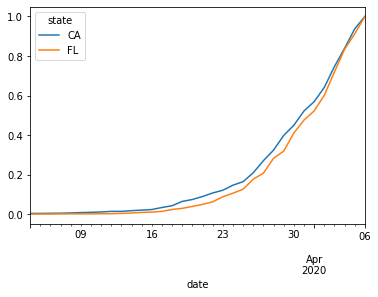

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

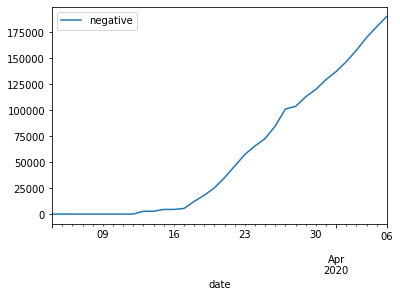

In [28]:
x = dfNYTesting.plot.line()

In [29]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
314,FL,2020-04-06,13324,13324,1.000000
315,FL,2020-04-05,12151,13324,0.911963
316,FL,2020-04-04,11111,13324,0.833909
317,FL,2020-04-03,9585,13324,0.719379
318,FL,2020-04-02,8010,13324,0.601171
319,FL,2020-04-01,6955,13324,0.521990
320,FL,2020-03-31,6338,13324,0.475683
321,FL,2020-03-30,5473,13324,0.410763
322,FL,2020-03-29,4246,13324,0.318673
323,FL,2020-03-28,3763,13324,0.282423


In [30]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .66)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
1302,PA,2020-04-03,8420,12980,0.648690
1356,RI,2020-04-03,711,1082,0.657116
1105,NM,2020-04-03,403,624,0.645833
1421,SD,2020-04-03,187,288,0.649306


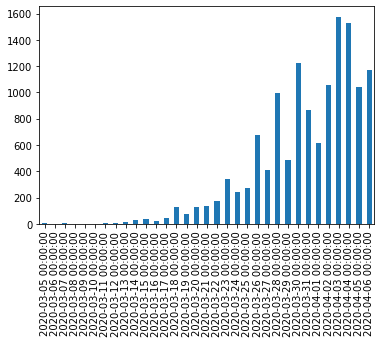

In [31]:
state = 'FL'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [34]:
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")

positive     361331
negative    1555764
pending       17292
death         10680
total       1934387
dtype: int64
Current Infection Rate 18.679354%
Percentage of US affected: 0.113335%


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [42]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.negative / dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:25]

,state_pos_pop,state_test_pop
state,,
NY,0.671800,0.977312
NJ,0.462611,0.539754
LA,0.319803,1.168023
MA,0.200754,0.908117
CT,0.193701,0.554794
MI,0.172437,0.300695
DC,0.155438,0.900603
WA,0.104847,1.095104
RI,0.102137,0.698440
